## Workflow
- Check buitin packages, check gpu
- EDA (Exploratory Data Analysis)
    - Check label value count
    - Check null
- Preprocess dataset
    - Resize image
    - Normalization
    - Save preprocessed images and the corresponding labels to resusable file (Because limitted resource)
    
## Reference

https://www.kaggle.com/code/meetnagadia/sorghum-100-cultivar-baseline

https://www.kaggle.com/code/gauravduttakiit/sorghum-cultivar-identification-class-dataset

https://www.kaggle.com/code/tchaye59/efficientnet-tensorflow-baseline-tpu

https://www.kaggle.com/code/lonnieqin/sorghum-100-cultivar-identification-with-cnn

https://www.kaggle.com/code/wakamori/sorghum-eda

### Check buitin packages, check gpu

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.2


In [2]:
# Check gpu device
print(tf.test.is_gpu_available())

False


In [3]:
# print the current directory
!pwd

/kaggle/working


In [4]:
# list folder
!ls

__notebook__.ipynb


### EDA

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
import random
import pickle
import os
from tqdm import tqdm
from PIL import Image

In [6]:
base_dir = "../input/sorghum-id-fgvc-9"
train_dir = "../input/sorghum-id-fgvc-9/train_images"
test_dir = "../input/sorghum-id-fgvc-9/test"

### Train data

In [7]:
train_df = pd.read_csv("../input/sorghum-id-fgvc-9/train_cultivar_mapping.csv")
print(f"Number of train images: {train_df.shape[0]}")
train_df.head()

Number of train images: 22194


,image,cultivar
0,2017-06-16__12-24-20-930.png,PI_257599
1,2017-06-02__16-48-57-866.png,PI_154987
2,2017-06-12__13-18-07-707.png,PI_92270
3,2017-06-22__13-18-06-841.png,PI_152651
4,2017-06-26__12-56-48-642.png,PI_176766


In [8]:
# Check image number in training data
print(f"There are {len(os.listdir(train_dir))} images in {train_dir}")

There are 22193 images in ../input/sorghum-id-fgvc-9/train_images


## Size of training data
**Note** that some images, listed in train_cultivar_mapping.csv do not exist

In [9]:
train_df["image_existence"] = [os.path.exists(os.path.join(train_dir, row.image)) for _, row in train_df.iterrows()]
print(f"Number of non-existent images: {train_df[train_df.image_existence == False].size}")

Number of non-existent images: 3


## Plot number of images

In [10]:
train_counts = train_df.cultivar.value_counts()
existed_train_counts = train_df[train_df.image_existence == True].cultivar.value_counts()
print(f"Number of cultivar: {existed_train_counts.size}")

Number of cultivar: 100


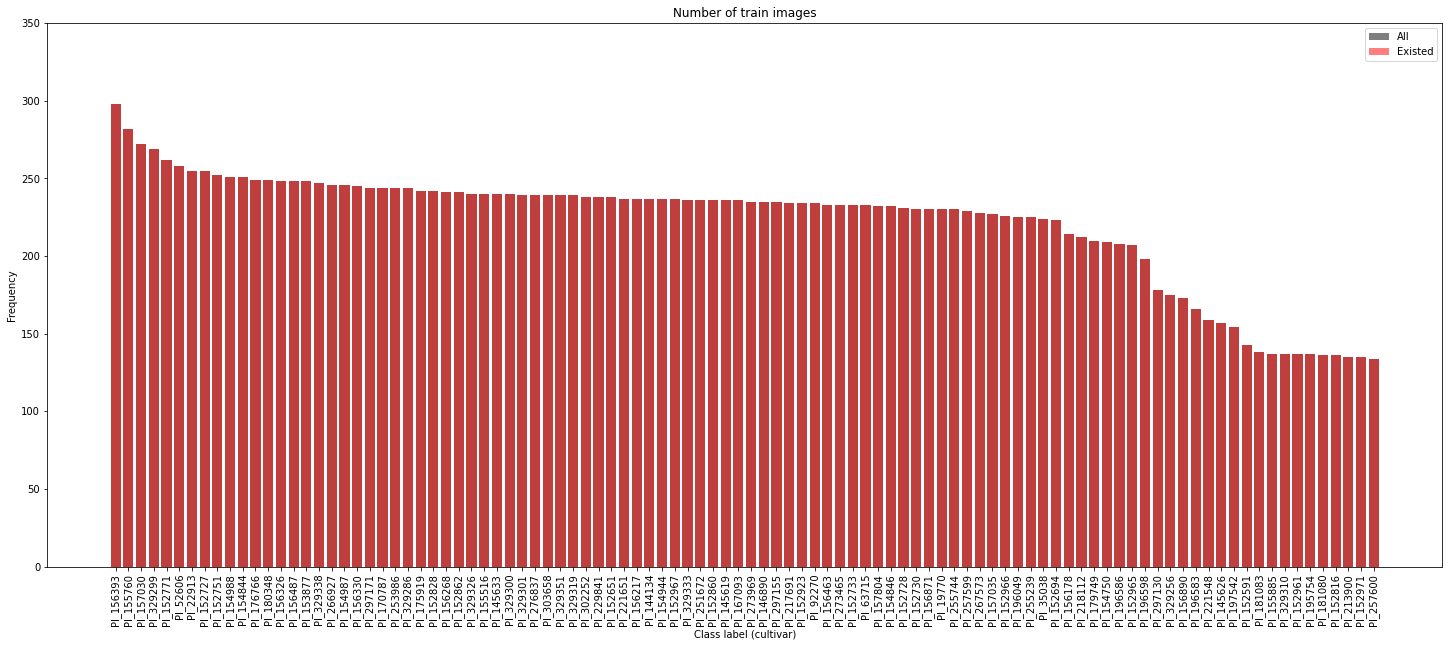

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize = (25,10))
# bar plot all images in train_dir
plt.bar(train_counts.index,train_counts.values,color = 'black', alpha = 0.5, label = "All")
# bar plot existed images
plt.bar(existed_train_counts.index,existed_train_counts.values,color = 'red',alpha = 0.5, label = "Existed")
plt.xticks(rotation = 90)
plt.xlabel("Class label (cultivar)")
plt.ylabel("Frequency")
plt.title("Number of train images")
plt.ylim(0,350)
plt.legend()
plt.show()
plt.savefig("./train_cultivar.png")

![plot](./train_cultivar.png)